<a href="https://colab.research.google.com/github/maah-gabs/Python_do_zero/blob/master/Exerc%C3%ADcio_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercício de Fixação. 

Para treinar alguns conceitos aprendidos no curso de Python do Zero, utilizarei o DataSet dispobilizado pelo professor Carlos Melo na aula "Analisando dados para Business Intelligence. O Dataset está disponível no site do [Kaggle](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_products_dataset.csv), porém, utilizaremos aqui em formato de excel para treinar manipulação de planilhas e google drive. 

Para este notebook, utilizarei algumas bibliotecas que serão descritas ao longo do estudo, porém, vamos iniciar instalando algumas bibliotecas que não fazem parte do ambiente colab. 

In [ ]:
# Instalando pacotes 
!pip install pywaffle -q

     |████████████████████████████████| 532kB 2.9MB/s 


Após instalar a biblioteca Pywaffle, iniciei na segunda linha a importação das principais bibliotecas que serão utilizadas neste exercicio. 

In [ ]:
# Instalando as bibliotecas 
import pandas as pd 
import matplotlib.pyplot as plt
import os 
from google.colab import drive
from pywaffle import Waffle

Para essa atividade, eu realizarei a utilizalção do Google Drive, desta forma, vamos criar o nosso drive. 

In [ ]:
# montando o Drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Após a importação do google drive, vamos listar quais são as pastas que estão dispostas neste local 

In [ ]:
#Verificando os arquivos que estão no Drive
!ls 'gdrive/My Drive'

'Colab Notebooks'	   'Exercicio 01 - pdfplumber.pdf'   relatorios
 controle_da_empresa.xlsx   modelo_de_relatorio.pdf	     Untitled0.ipynb
 dados_ecommerce.xlsx	   'Modulo 02'


Após a execução da linha abaixo, conseguimos perceber que o arquivo `dados_ecommerce.xlsx` está salvo na raiz do meu google drive. 

Neste momento, vamos importar o DataSet utilizando a variável planilha. Lembre - se, que quando estamos lidando com planilhas, é necessário após a linha de código de importação que seja descrito `None` para que todas as abas da planilha sejam importadas, ok? 

In [ ]:
# Importando a DataSet.
planilha = pd.read_excel("/content/gdrive/My Drive/dados_ecommerce.xlsx", None)


Após importar a planilha com todas as abas, vamos checar o nome dessas abas, certo? Então, vamos utilizar `.keys ( ).` 

In [ ]:
# Verificando o nome das abas
planilha.keys()

dict_keys(['Clientes', 'Pagamentos', 'Itens'])

A partir da linha descrita acima, vou criar uma variável para cada uma das abas com os nomes: 

* `clientes = planilha ['Clientes']`
* `pagamentos = planilha['Pagamentos']`
* `itens = planilha['Itens']`


Conforme descrito abaixo:

In [ ]:
#Verificando a Aba Clientes (5 primeiras entradas)
clientes = planilha['Clientes']
clientes.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#Verificando a Aba Pagamentos (5 primeiras entradas)
pagamentos = planilha['Pagamentos']
pagamentos.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
#Verificando a aba Items (5 primeiras entradas)
itens = planilha['Itens']
itens.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# Tornar as cinco cidades que mais utilizam ecommerce em variável 
cidades_compradoras = clientes['customer_city'].value_counts().head()

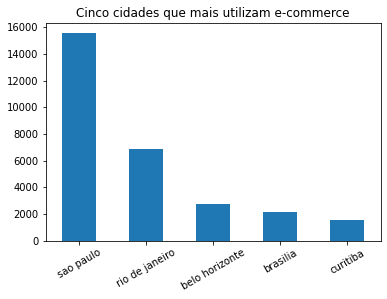

In [ ]:
# Plotar um gráfico de Barras com a cidade que mais vende.
fig, ax = plt.subplots()
ax = cidades_compradoras.plot(kind='bar')
ax.set_title('Cinco cidades que mais utilizam e-commerce')
plt.xticks(rotation=30)
plt.show()

In [ ]:
tipo_pagamento = pagamentos['payment_type'].value_counts()
tipo_pagamento

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

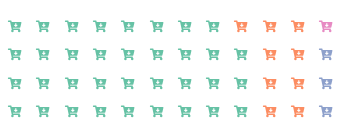

In [ ]:
#Gráfico de Waffle que mostra os tipos de pagamento 
fig = plt.figure(
                 FigureClass = Waffle, 
                 rows = 4,
                 columns = 12, 
                 values = tipo_pagamento, icons = 'cart-arrow-down', icon_size = 12, 
                 legend ={'loc': 'upper left', 
                          'bbox_to_anchor': (1.5,1)},
                 icon_legend=True  
                 )  
     
fig.set_tight_layout(False)
plt.show()
